In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
FILENAME = "fire_theft.csv"

In [3]:
N_EPOCHS = 1000

In [4]:
LEARNING_RATE=0.001

In [5]:
df=pd.read_csv(FILENAME)

In [6]:
data = df.as_matrix()

In [7]:
x = tf.placeholder(tf.float32, name="X")
y = tf.placeholder(tf.float32, name="Y")

In [8]:
w = tf.Variable(0.0, name="weights") 
b = tf.Variable(0.0, name="bias")

In [9]:
# y_predicted = tf.mul(w, tf.add(x, b))
y_predicted = w * x + b

In [10]:
cost = tf.reduce_mean(tf.square(y - y_predicted), name="cost")
#loss = tf.square(y - y_predicted, name="loss")

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(cost, name="train_op")

In [12]:
init_op = tf.global_variables_initializer()

In [13]:
training_costs = []

In [14]:
with tf.Session() as s:
    s.run(init_op)
    for e in range(N_EPOCHS):
        for x_data,y_data in data:
            c, _ = s.run([cost, train_op], feed_dict={x: x_data, y:y_data})
            training_costs.append(c)
        if not e % 100:
            print('epoche: %4d, cost: %4f' % (e,c))
    w_value, b_value = s.run([w, b])
        

epoche:    0, cost: 16.054260
epoche:  100, cost: 28.199051
epoche:  200, cost: 35.292103
epoche:  300, cost: 35.800919
epoche:  400, cost: 35.834251
epoche:  500, cost: 35.835987
epoche:  600, cost: 35.835987
epoche:  700, cost: 35.835987
epoche:  800, cost: 35.835987
epoche:  900, cost: 35.835987


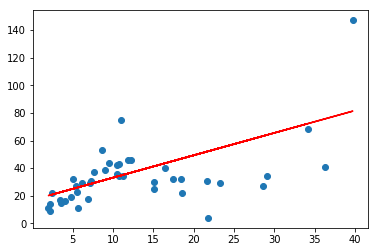

In [15]:
x_data = df['X']
y_data = df['Y']
plt.figure()
# alle Datenpunkte
plt.plot(x_data, y_data, 'o')
# Regressionsgerade y = w * x + b
plt.plot(x_data, w_value * x_data + b_value, color='red')
plt.show()